<a href="https://colab.research.google.com/github/Jayalakshmisukumaran/Jaya_lakshmi/blob/main/Phish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Loading the Packages and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
phish= pd.read_csv('/content/drive/MyDrive/dataset_phishing 2.csv')

In [4]:
phish.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [5]:
phish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [6]:
phish['status'].value_counts()

legitimate    5715
phishing      5715
Name: status, dtype: int64

In [7]:
phish.sample(1)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
10902,http://www.scs.si/,18,10,0,2,0,0,0,0,0,...,1,1,0,252,5592,0,0,0,2,legitimate


In [8]:
phish.shape

(11430, 89)

## 2. Pre-processing

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:

lab = LabelEncoder()

In [11]:
phish['status']= lab.fit_transform(phish['status'])

In [12]:
phish = phish.drop(columns=['url'])

In [13]:
phish.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


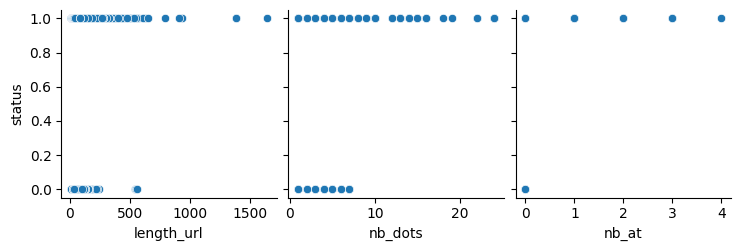

In [14]:
sns.pairplot(phish,x_vars= ['length_url','nb_dots','nb_at'],y_vars= 'status');

In [15]:
X = phish.drop(columns=['status'])

In [16]:
X.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,...,0,1,0,0,77,5767,0,0,1,2
2,126,50,1,4,1,0,1,2,0,3,...,0,1,0,0,14,4004,5828815,0,1,0
3,18,11,0,2,0,0,0,0,0,0,...,0,1,0,0,62,-1,107721,0,0,3
4,55,15,0,2,2,0,0,0,0,0,...,0,0,1,0,224,8175,8725,0,0,6


In [17]:
y= phish['status']

In [18]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: status, dtype: int64

## 3. Model Building

In [19]:
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV,ParameterGrid

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
from sklearn.metrics import accuracy_score,balanced_accuracy_score

In [22]:
from sklearn.tree import DecisionTreeClassifier


### KNN Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knnc = KNeighborsClassifier(1)

In [25]:
knnc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
knnc.score(X_train,y_train)

1.0

In [27]:
knnc.score(X_test,y_test)

0.8534558180227472

In [28]:
knnc3 = KNeighborsClassifier(3)
knnc3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
knnc3.score(X_train,y_train)

0.914588801399825

In [30]:
knnc3.score(X_test,y_test)

0.8394575678040245

In [31]:
knnc5=KNeighborsClassifier(5)
knnc5.fit(X_train,y_train)
knnc5.score(X_test,y_test), knnc5.score(X_train,y_train)

(0.8403324584426947, 0.8871391076115486)

In [32]:
from sklearn.metrics import get_scorer_names

In [33]:
cvs = cross_val_score(knnc5, X_train,y_train,scoring ='balanced_accuracy')

In [34]:
cvs

array([0.83487524, 0.83644225, 0.81240315, 0.83702637, 0.82710153])

In [35]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

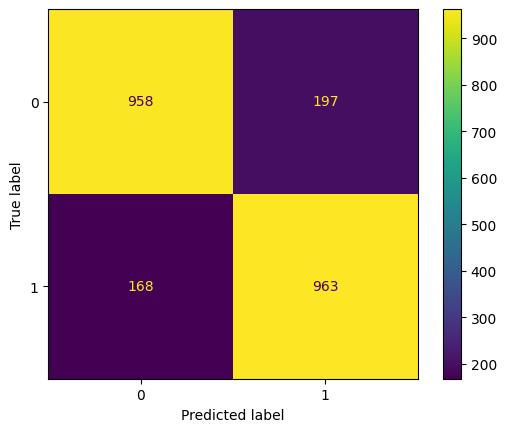

In [36]:
cm = confusion_matrix(y_test,knnc5.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

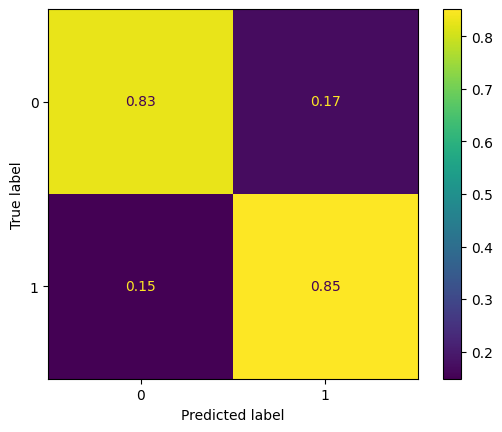

In [37]:
cm = confusion_matrix(y_test,knnc5.predict(X_test),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [38]:
accuracy_score(y_test, knnc5.predict(X_test))


0.8403324584426947

In [39]:
balanced_accuracy_score(y_test,knnc5.predict(X_test))

0.840448057689437

### DecisionTree Classifier

In [40]:
dtc = DecisionTreeClassifier()

In [41]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
dtc.score(X_train,y_train)

1.0

In [43]:
dtc.score(X_test,y_test)

0.9444444444444444

In [44]:
cvs = cross_val_score(dtc,X_train,y_train,scoring='balanced_accuracy')

In [45]:
cvs

array([0.92947062, 0.943728  , 0.93055815, 0.92834424, 0.92834262])

In [46]:
accuracy_score(y_test,dtc.predict(X_test))

0.9374453193350831

In [47]:
balanced_accuracy_score(y_test,dtc.predict(X_test))

0.937507320265941

In [48]:
grid_param = {'max_depth':[8,10,12,14,16] }

In [49]:
grid = GridSearchCV(DecisionTreeClassifier(),grid_param,scoring='accuracy',return_train_score=True)

In [50]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 10, 12, 14, 16]},
             return_train_score=True, scoring='accuracy')

In [51]:
grid.best_params_

{'max_depth': 8}

In [52]:
grid.best_score_

0.9384278694937986

In [53]:
grid.cv_results_

{'mean_fit_time': array([0.13413429, 0.16853194, 0.19475985, 0.2076674 , 0.19098563]),
 'std_fit_time': array([0.01944367, 0.00352279, 0.01183852, 0.01037626, 0.04532826]),
 'mean_score_time': array([0.00540085, 0.0057899 , 0.00549736, 0.00658045, 0.00496345]),
 'std_score_time': array([0.00056149, 0.00044588, 0.00012795, 0.00131858, 0.00105535]),
 'param_max_depth': masked_array(data=[8, 10, 12, 14, 16],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 8},
  {'max_depth': 10},
  {'max_depth': 12},
  {'max_depth': 14},
  {'max_depth': 16}],
 'split0_test_score': array([0.93985785, 0.93603062, 0.9393111 , 0.92946966, 0.93439038]),
 'split1_test_score': array([0.94915254, 0.94532531, 0.94587206, 0.94587206, 0.94204483]),
 'split2_test_score': array([0.94313833, 0.93603062, 0.93329688, 0.93712411, 0.9300164 ]),
 'split3_test_score': array([0.93712411, 0.93821761, 0.93767086, 0.93603062, 0.9300164 ]),
 'sp

In [54]:
gs_results = pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')

In [55]:
gs_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [56]:
gs_results[['param_max_depth','mean_fit_time','mean_train_score','mean_test_score','rank_test_score']]

,param_max_depth,mean_fit_time,mean_train_score,mean_test_score,rank_test_score
0,8,0.134134,0.968504,0.938428,1
2,12,0.194760,0.989829,0.936569,2
1,10,0.168532,0.980862,0.935585,3
3,14,0.207667,0.994587,0.933726,4
4,16,0.190986,0.997785,0.932633,5


In [44]:
dtc12 = DecisionTreeClassifier(max_depth=12)
dtc12.fit(X_train,y_train)
dtc12.score(X_train,y_train), dtc12.score(X_test,y_test)

(0.9888451443569554, 0.9435695538057742)

In [58]:
balanced_accuracy_score(y_test,dtc12.predict(X_test))

0.9427572427572428

In [45]:
from sklearn.dummy import DummyClassifier

In [46]:
balanced_accuracy_score(y_test,DummyClassifier().fit(X_train,y_train).predict(X_test))

0.5

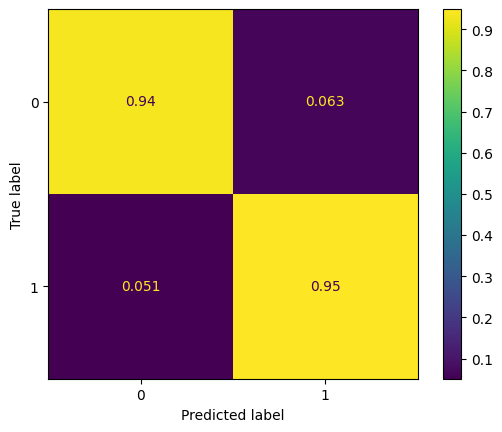

In [62]:
cm = confusion_matrix(y_test,dtc12.predict(X_test),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### RandomForest Classifier

In [47]:
from sklearn.ensemble import  RandomForestClassifier

In [48]:
rfc = RandomForestClassifier()

In [49]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
rfc.score(X_train,y_train)

1.0

In [67]:
rfc.score(X_test,y_test)

0.9702537182852143

In [68]:
grid_param = {'max_depth': [10,12,14,16,18,20],
              'min_samples_leaf': [8],
              'min_samples_split': [15],
              'n_estimators': [100,200,300,400]}

In [69]:
grid = GridSearchCV(RandomForestClassifier(),grid_param,scoring='accuracy',return_train_score=True)

In [70]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': [8], 'min_samples_split': [15],
                         'n_estimators': [100, 200, 300, 400]},
             return_train_score=True, scoring='accuracy')

In [71]:
grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 8,
 'min_samples_split': 15,
 'n_estimators': 400}

In [72]:
grid.best_score_

0.9582232761023768

In [73]:
gs_results = pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')

In [74]:
gs_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [75]:
gs_results[['param_n_estimators','param_max_depth','mean_train_score','mean_test_score','rank_test_score']]

,param_n_estimators,param_max_depth,mean_train_score,mean_test_score,rank_test_score
23,400,20,0.971429,0.958223,1
19,400,18,0.971785,0.958005,2
15,400,16,0.971703,0.957786,3
7,400,12,0.970828,0.957677,4
22,300,20,0.971921,0.957458,5
11,400,14,0.971539,0.957458,6
13,200,16,0.971703,0.957458,7
17,200,18,0.971457,0.957349,8
10,300,14,0.971457,0.957348,9
18,300,18,0.971429,0.957130,10


In [51]:
rfc=RandomForestClassifier(n_estimators=200,max_depth=18,min_samples_split=15,min_samples_leaf=8)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=18, min_samples_leaf=8, min_samples_split=15,
                       n_estimators=200)

In [52]:
balanced_accuracy_score(y_test,rfc.predict(X_test))

0.9606347675313192

In [78]:
rfc=RandomForestClassifier(n_estimators=50,max_depth=20,min_samples_split=15,min_samples_leaf=8)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=8, min_samples_split=15,
                       n_estimators=50)

In [79]:
balanced_accuracy_score(y_test,rfc.predict(X_test))

0.9619242826139378

In [80]:
rfc.score(X_train,y_train)

0.9700349956255468

In [53]:
rfc= RandomForestClassifier(n_estimators=200,max_depth=12,min_samples_leaf=8,min_samples_split=15)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=8, min_samples_split=15,
                       n_estimators=200)

In [54]:
balanced_accuracy_score(y_test,rfc.predict(X_test))

0.9619334688300205

In [83]:
rfc.score(X_train,y_train)

0.9716754155730534

In [84]:
rfc.score(X_test,y_test)

0.9619422572178478

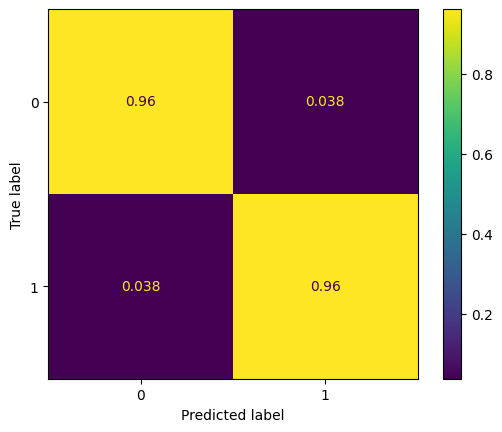

In [85]:
cm=confusion_matrix(y_test,rfc.predict(X_test),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Feature Importance

In [86]:
def plot_rf_feat_imp_barh(rf,feat_names,ax=None,top_feat_k=10,style_kws={}):
     """ """
     if ax is None:
      fig,ax=plt.subplots()
      return pd.Series(rf.feature_importances_,
                 index=feat_names).sort_values().tail(top_feat_k).plot.barh(**style_kws)

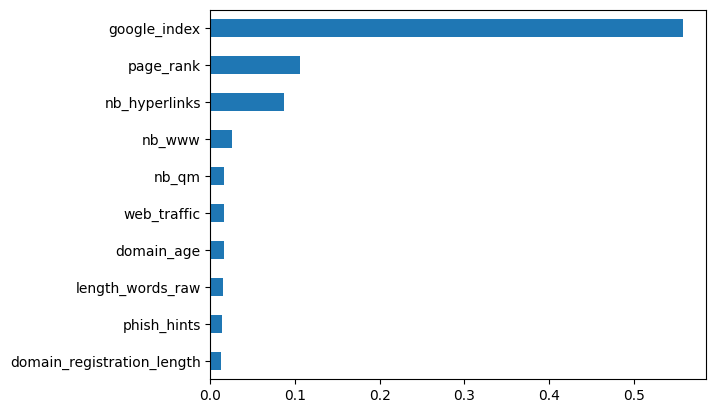

In [87]:
plot_rf_feat_imp_barh(dtc12,X_test.columns);

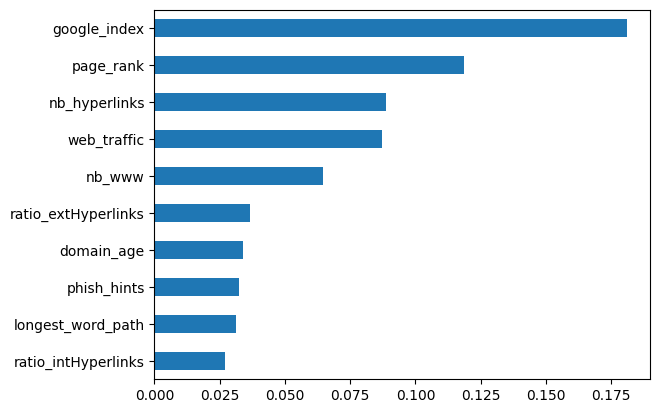

In [88]:
plot_rf_feat_imp_barh(rfc,X_test.columns);

### Logistic Regression Classifier

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [56]:
pipe = make_pipeline(StandardScaler(),LogisticRegression(C=0.01,max_iter=200))

In [57]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, max_iter=200))])

In [92]:
pipe.score(X_test,y_test)

0.9444444444444444

In [93]:
logreg = LogisticRegression(C=0.01,max_iter=200)

In [94]:
logreg.fit(X_train,y_train)

LogisticRegression(C=0.01, max_iter=200)

In [95]:
logreg.score(X_train,y_train),logreg.score(X_test,y_test)

(0.7858705161854768, 0.7909011373578303)

In [96]:
balanced_accuracy_score(y_test,logreg.predict(X_test))

0.7905381974347492

In [97]:
grid_param= { 'C': [0.001,0.01,0.1,1,10,100],
             'max_iter':[100,200,300]}

In [98]:
grid = GridSearchCV(logreg,grid_param,return_train_score=True)

In [99]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(estimator=LogisticRegression(C=0.01, max_iter=200),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300]},
             return_train_score=True)

In [100]:
grid.best_params_

{'C': 0.01, 'max_iter': 200}

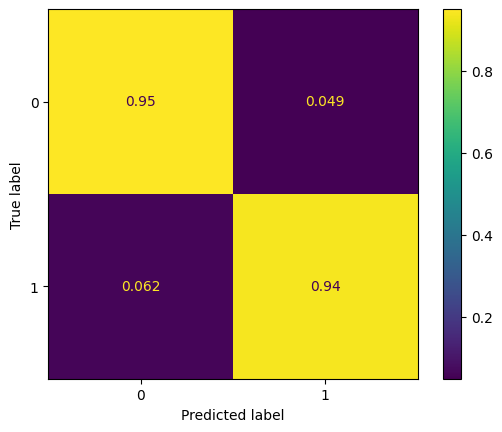

In [101]:
cm = confusion_matrix(y_test,pipe.predict(X_test),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [103]:
X.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,...,0,1,0,0,77,5767,0,0,1,2
2,126,50,1,4,1,0,1,2,0,3,...,0,1,0,0,14,4004,5828815,0,1,0
3,18,11,0,2,0,0,0,0,0,0,...,0,1,0,0,62,-1,107721,0,0,3
4,55,15,0,2,2,0,0,0,0,0,...,0,0,1,0,224,8175,8725,0,0,6


In [104]:
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns= X.columns)

In [105]:
X_scaled.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,-0.436327,-0.193964,-0.421020,0.379116,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,-0.377549,-1.860473,1.129194,-0.28037,-0.549299,-1.307594,-0.429340,6.978227,0.934264,0.320974
1,0.287067,0.177207,2.375182,-1.081136,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,-0.377549,0.537498,-0.885587,-0.28037,-0.510022,0.548471,-0.429340,-0.143303,0.934264,-0.467407
2,1.173224,2.682613,2.375182,1.109242,0.001174,-0.142915,2.356473,2.237556,0.0,2.711505,...,-0.377549,0.537498,-0.885587,-0.28037,-0.587348,-0.018839,2.491612,-0.143303,0.934264,-1.255788
3,-0.779940,-0.936306,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,-0.377549,0.537498,-0.885587,-0.28037,-0.528433,-1.307594,-0.375359,-0.143303,-1.070361,-0.073217
4,-0.110800,-0.565135,-0.421020,-0.351010,0.480332,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,-0.377549,-1.860473,1.129194,-0.28037,-0.329595,1.323334,-0.424968,-0.143303,-1.070361,1.109355


In [106]:
kmeans = KMeans(n_clusters=2, n_init='auto').fit(X)
y_pred = kmeans.predict(X)

In [107]:
y_pred[:5]

array([1, 1, 0, 1, 1], dtype=int32)

In [108]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: status, dtype: int64

### Support Vector Classifier

In [59]:
from sklearn.svm import SVC

In [110]:
grid_param = {'C':[0.001,0.01,0.1,1,10,100],
              'gamma':[0.001,0.01,0.1,1,10,100]}

In [111]:
grid = GridSearchCV(SVC(),grid_param,return_train_score=True)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [60]:
svc = make_pipeline(StandardScaler(),SVC())

In [61]:
svc.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [62]:
svc.score(X_test,y_test), svc.score(X_train,y_train)

(0.963254593175853, 0.9695975503062118)

In [ ]:
svc_1 = SVC(C=100,gamma = 0.001)
svc_1.fit(X_train,y_train)
svc_1.score(X_train,y_train),svc_1.score(X_test,y_test)


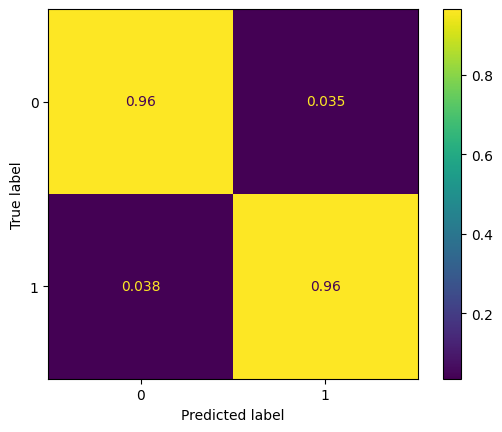

In [63]:
cm = confusion_matrix(y_test,svc.predict(X_test),normalize ='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=12),n_estimators=500,max_samples=100, bootstrap = True,n_jobs =-1)

In [ ]:
bag_clf.fit(X_train,y_train)

In [ ]:
bag_clf.score(X_train,y_train),bag_clf.score(X_test,y_test)

## Gradient Boosted Tree


In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
grid_param = {'max_depth':[1,2,3,4],
              'learning_rate':[0.01,0.1,1,10]
              }

In [ ]:
grid = GridSearchCV(GradientBoostingClassifier(),grid_param,return_train_score=True)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.score(X_train,y_train)

In [ ]:
grid.best_score_

In [65]:
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.1)

In [66]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=4)

In [67]:
gbc.score(X_test,y_test)

0.9676290463692039

In [68]:
gbc.score(X_train,y_train)

0.9759405074365705

In [ ]:
gbt = GradientBoostingClassifier()
gbt.fit(X_train,y_train)

In [ ]:
gbt.score(X_test,y_test)

In [ ]:
cm = confusion_matrix(y_test,gbc.predict(X_test),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Hist-gradient Boosting Classifier

In [69]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [70]:
hgc = HistGradientBoostingClassifier(learning_rate=0.01,max_depth=16,max_iter=300)

In [71]:
hgc.fit(X_train,y_train)

HistGradientBoostingClassifier(learning_rate=0.01, max_depth=16, max_iter=300)

In [72]:
hgc.score(X_train,y_train), hgc.score(X_test,y_test)

(0.9692694663167104, 0.9654418197725284)

In [ ]:
cvs = cross_val_score(hgc,X_train,y_train)

In [ ]:
cvs

In [ ]:
np.mean(cvs)

In [ ]:
param_grid ={ 'max_depth':[10,12,14,16,18,20],
             'learning_rate':[0.001,0.01,0.1,1,10],
              'max_iter':[100,200,300]}

In [ ]:
grid = GridSearchCV(HistGradientBoostingClassifier(),param_grid,return_train_score=True)

In [146]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=HistGradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [10, 12, 14, 16, 18, 20],
                         'max_iter': [100, 200, 300]},
             return_train_score=True)

In [147]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 16, 'max_iter': 300}

In [148]:
grid.best_score_

0.9693778092559338

In [149]:
grid.score(X_train,y_train)

1.0

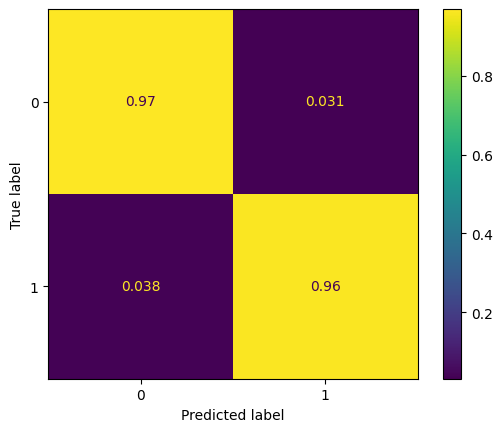

In [150]:
cm = confusion_matrix(y_test,hgc.predict(X_test),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Voter Ensemble

In [73]:
from sklearn.ensemble import VotingClassifier

In [74]:
ensemble = VotingClassifier(estimators =[("rf",RandomForestClassifier()),("gb",GradientBoostingClassifier()),("svm",SVC())],voting="hard")

In [75]:
ensemble.fit(X_train,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('gb', GradientBoostingClassifier()),
                             ('svm', SVC())])

In [76]:
ensemble.score(X_train,y_train), ensemble.score(X_test,y_test)

(0.97998687664042, 0.9636920384951881)

In [77]:
# HRS model
ensemble = VotingClassifier(estimators = [('rf',RandomForestClassifier()),('hgb',HistGradientBoostingClassifier()),('svm',SVC())])

In [78]:
ensemble.fit(X_train,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('hgb', HistGradientBoostingClassifier()),
                             ('svm', SVC())])

In [79]:
ensemble.score(X_train,y_train),ensemble.score(X_test,y_test)

(0.9980314960629921, 0.9706911636045494)

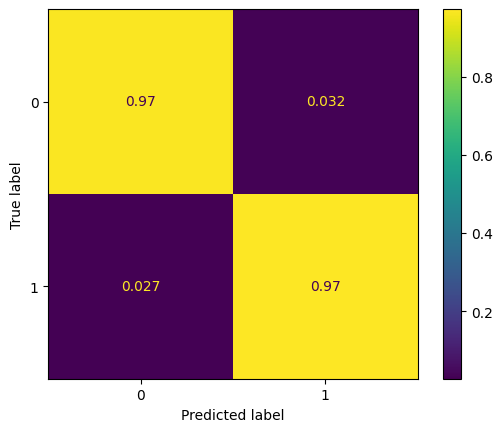

In [158]:
cm = confusion_matrix(y_test,ensemble.predict(X_test),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Feature Selection
#####  SelectKBest, SelectFromModel

In [82]:
from sklearn.feature_selection import SelectKBest,f_classif

In [83]:
selector = make_pipeline(SelectKBest(f_classif,k=30)).set_output(transform='pandas').fit(X_train,y_train)
X_train_sel = selector.transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 8 59 61 63 68 71] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [84]:
X_test_sel = selector.transform(X_test)

In [85]:
ensemble.fit(X_train_sel,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('hgb', HistGradientBoostingClassifier()),
                             ('svm', SVC())])

In [86]:
ensemble.score(X_train_sel,y_train),ensemble.score(X_test_sel,y_test)

(0.9971566054243219, 0.9693788276465442)

In [87]:
from sklearn.feature_selection import SelectFromModel
selectrfc = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42),threshold="median")

In [88]:
 selectrfc.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='median')

In [89]:
X_train_rfc = selectrfc.transform(X_train)

In [90]:
X_train_rfc.shape

(9144, 44)

In [91]:
X_test_rfc = selectrfc.transform(X_test)

In [92]:
X_test_rfc.shape

(2286, 44)

In [80]:
rfc_1 = RandomForestClassifier(max_depth=18,min_samples_split=15, min_samples_leaf=8,random_state =100)

In [93]:
rfc_1.fit(X_train_rfc,y_train)

RandomForestClassifier(max_depth=18, min_samples_leaf=8, min_samples_split=15,
                       random_state=100)

In [94]:
balanced_accuracy_score(y_test,rfc_1.predict(X_test_rfc))

0.9597597804494356

In [95]:
rfc_1.score(X_train_rfc,y_train), rfc_1.score(X_test_rfc,y_test)

(0.9705818022747157, 0.9597550306211724)

In [96]:
ensemble.fit(X_train_rfc,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('hgb', HistGradientBoostingClassifier()),
                             ('svm', SVC())])

In [97]:
ensemble.score(X_train_rfc,y_train),ensemble.score(X_test_rfc,y_test)

(0.9980314960629921, 0.968066491688539)

In [98]:
rfc_1.fit(X_train,y_train)

RandomForestClassifier(max_depth=18, min_samples_leaf=8, min_samples_split=15,
                       random_state=100)

In [99]:
balanced_accuracy_score(y_test,rfc_1.predict(X_test))

0.9614913821810374

## RFE

In [100]:
from sklearn.feature_selection import RFE

In [101]:
rfe = RFE(RandomForestClassifier(n_estimators=400,random_state = 42),n_features_to_select=43)

In [102]:
rfe.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(n_estimators=400, random_state=42),
    n_features_to_select=43)

In [103]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)


In [104]:
pipe.fit(X_train_rfe,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, max_iter=200))])

In [105]:
pipe.score(X_test_rfe,y_test)

0.9378827646544182

In [106]:
pipe.score(X_train_rfe,y_train)

0.939413823272091

In [107]:
rfc.fit(X_train_rfe,y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=8, min_samples_split=15,
                       n_estimators=200)

In [108]:
rfc.score(X_test_rfe,y_test)

0.9619422572178478

In [109]:
ensemble.fit(X_train_rfe,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('hgb', HistGradientBoostingClassifier()),
                             ('svm', SVC())])

In [110]:
ensemble.score(X_train_rfe,y_train),ensemble.score(X_test_rfe,y_test)

(0.9982502187226596, 0.9693788276465442)

### Cross Validation

In [111]:
from sklearn.model_selection import cross_val_score

In [193]:
#rfc
cvs = cross_val_score(rfc,X_train,y_train)

In [194]:
cvs


array([0.95297977, 0.9650082 , 0.96664844, 0.95188628, 0.95021882])

In [195]:
np.mean(cvs),np.std(cvs)

(0.9573483016750552, 0.00699877106011392)

In [196]:
cvs = cross_val_score(ensemble,X_train,y_train)

In [197]:
cvs

array([0.96664844, 0.97047567, 0.96883543, 0.95899399, 0.95623632])

In [198]:
np.mean(cvs)

0.9642379700736852

In [199]:
#hist-gradient boosted tree
cvs = cross_val_score(hgc,X_train,y_train)

In [200]:
cvs


array([0.95024604, 0.96336796, 0.95735375, 0.95079278, 0.95404814])

In [201]:
np.mean(cvs)

0.9551617329841491

In [202]:
#svc
cvs = cross_val_score(svc,X_train,y_train)

In [203]:
cvs

array([0.95735375, 0.95626025, 0.95352652, 0.95297977, 0.95404814])

In [204]:
np.mean(cvs)

0.9548336848704257

In [205]:
from sklearn.model_selection import cross_validate

In [206]:
cv = cross_validate(rfc,X_train,y_train,return_train_score=True)

In [207]:
cv

{'fit_time': array([2.16171527, 2.12231612, 2.07661486, 3.09443498, 2.41028857]),
 'score_time': array([0.06403041, 0.06690645, 0.06286263, 0.08102846, 0.0651505 ]),
 'test_score': array([0.95407326, 0.96336796, 0.96446145, 0.94969929, 0.94912473]),
 'train_score': array([0.96992481, 0.9696514 , 0.96910458, 0.97170198, 0.97238928])}

In [112]:
from sklearn.model_selection import ShuffleSplit

In [113]:
shuffle = ShuffleSplit(test_size=0.5,train_size=0.5,n_splits= 10)

In [114]:
scores = cross_val_score(pipe,X_train,y_train,cv=shuffle)

In [211]:
scores

array([0.93591426, 0.94181977, 0.94269466, 0.93700787, 0.94335083,
       0.93810149, 0.93613298, 0.93897638, 0.94291339, 0.93657043])

In [212]:
np.mean(scores)

0.9393482064741908

## Dimensionality Reduction using PCA

In [115]:
from sklearn.decomposition import PCA

In [116]:
pca = PCA(n_components=10)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train))

In [117]:
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-785615.476963,3841.536731,728.856661,-63.732428,-64.591897,23.575017,-43.670615,15.317013,-28.476912,4.308892
1,-856984.327353,-3422.782105,34.719463,-27.568663,-39.860249,53.892299,-41.290014,22.929295,-39.750419,-12.000031
2,-337432.363439,3411.673587,-411.528579,206.641517,-1.169423,-53.108189,44.444794,41.206728,-21.424775,3.295915
3,-796043.953294,604.423578,128.277384,43.840121,72.367225,-51.539842,-24.735506,-20.933619,7.881325,-11.370106
4,-699988.240507,2516.017401,-88.724295,2.528483,18.050707,-63.878168,31.818014,9.457174,-21.488963,6.570132


In [118]:
X_test_pca = pd.DataFrame(pca.fit_transform(X_test))

In [119]:
ensemble.fit(X_train_pca,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('hgb', HistGradientBoostingClassifier()),
                             ('svm', SVC())])

In [120]:
ensemble.score(X_train_pca,y_train),ensemble.score(X_test_pca,y_test)

(0.9711286089238845, 0.7388451443569554)

## F1 score

In [121]:
from sklearn.metrics import f1_score

In [122]:
f1_score(y_test,knnc5.predict(X_test))  #kNN

0.8406809253601047

In [123]:
f1_score(y_test,dtc12.predict(X_test))   #decision tree

0.943246810382754

In [124]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=8, min_samples_split=15,
                       n_estimators=200)

In [125]:
f1_score(y_test,rfc.predict(X_test))     #random forest

0.9611307420494699

In [126]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, max_iter=200))])

In [127]:
f1_score(y_test,pipe.predict(X_test))     #logistic regressor

0.9435304579813252

In [128]:
f1_score(y_test,svc.predict(X_test))     #support vector classifier

0.9628318584070797

In [129]:
f1_score(y_test,gbc.predict(X_test))    #gradient boosted tree

0.9672855879752431

In [130]:
f1_score(y_test,hgc.predict(X_test))    #Hist-gradient boosted tree

0.9649667405764967

In [131]:
ensemble.fit(X_train,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('hgb', HistGradientBoostingClassifier()),
                             ('svm', SVC())])

In [132]:
f1_score(y_test,ensemble.predict(X_test)) #Voter ensemble (rfc,hgc,svc)

0.9717314487632509